In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('ml-latest-small/movies.csv')

print(movies.info())
print(movies.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
(9742, 3)


In [3]:
movies['genres'] = movies['genres'].str.split('|')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [4]:
movies['year'] = movies['title'].str.extract(r'[a-zA-Z0-9*] \(([0-9]{4})\)')
movies['title'] = movies['title'].str[:-7]
movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [5]:
movies[movies.isna().any(axis=1)]

,movieId,title,genres,year
28,29,"City of Lost Children, The (Cité des enfants p...","[Adventure, Drama, Fantasy, Mystery, Sci-Fi]",NaN
29,30,Shanghai Triad (Yao a yao yao dao waipo qiao),"[Crime, Drama]",NaN
31,32,Twelve Monkeys (a.k.a. 12 Monkeys),"[Mystery, Sci-Fi, Thriller]",NaN
43,47,Seven (a.k.a. Se7en),"[Mystery, Thriller]",NaN
52,58,"Postman, The (Postino, Il)","[Comedy, Drama, Romance]",NaN
...,...,...,...,...
9669,182727,A Christmas Story Live!,[(no genres listed)],NaN
9703,185435,"Game Over, Man!","[Action, Comedy]",NaN
9711,187717,Won't You Be My Neighbor?,[Documentary],NaN
9715,188751,Mamma Mia: Here We Go Again!,"[Comedy, Romance]",NaN


In [6]:
movies = movies.dropna().reset_index(drop=True)
print(movies.shape)
movies.head()

(8480, 4)


,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [7]:
movies['genres'].explode().unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [8]:
def check_in_list_IMAX(genres_list):
    if 'IMAX' in genres_list:
        return True
    return False
def check_in_list_nogenres(genres_list):
    if '(no genres listed)' in genres_list:
        return True
    return False

print(movies['genres'].apply(check_in_list_nogenres).value_counts())
# print(movies['genres'].apply(check_in_list_IMAX).value_counts())

genres
False    8458
True       22
Name: count, dtype: int64


In [9]:
def remove_genre(x, genre):
    if genre in x:
        x.remove(genre)
    return x
movies = movies[~movies['genres'].apply(lambda x: '(no genres listed)' in x)]
movies['genres'] = movies['genres'].apply(remove_genre, args=('IMAX',))
movies['genres'] = movies['genres'].apply(remove_genre, args=('War',))
movies['genres'] = movies['genres'].apply(remove_genre, args=('Film-Noir',))
movies['genres'] = movies['genres'].apply(remove_genre, args=('Western',))
movies['genres'].explode().unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'Musical', 'Documentary', nan], dtype=object)

In [10]:
def check_len_list(x):
    if len(x) == 0:
        return False
    return True

movies = movies[movies['genres'].apply(check_len_list)]
movies.reset_index(drop=True,inplace=True)
movies.tail(10)

#There exist movies with repeated names but different ids
movies['movieId'].value_counts().sort_values(ascending=False)

movieId
1         1
38        1
4         1
5         1
6         1
         ..
193581    1
193583    1
193585    1
193587    1
193609    1
Name: count, Length: 8429, dtype: int64

In [11]:
genres_one_hot = pd.get_dummies(movies['genres'].explode()).astype('int')
movies = movies.merge(genres_one_hot, left_index=True,right_index=True)

movies = movies.drop(['genres'],axis='columns').groupby('movieId').max().reset_index()
movies.tail(10)

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller
8419,193565,Gintama: The Movie,2010,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0
8420,193567,anohana: The Flower We Saw That Day - The Movie,2013,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
8421,193571,Silver Spoon,2014,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
8422,193573,Love Live! The School Idol Movie,2015,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8423,193579,Jon Stewart Has Left the Building,2015,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8424,193581,Black Butler: Book of the Atlantic,2017,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0
8425,193583,No Game No Life: Zero,2017,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
8426,193585,Flint,2017,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8427,193587,Bungo Stray Dogs: Dead Apple,2018,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8428,193609,Andrew Dice Clay: Dice Rules,1991,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [12]:
movies.head(10)

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller
0,1,Toy Story,1995,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0
1,2,Jumanji,1995,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,6,Heat,1995,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6,7,Sabrina,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7,8,Tom and Huck,1995,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death,1995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye,1995,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


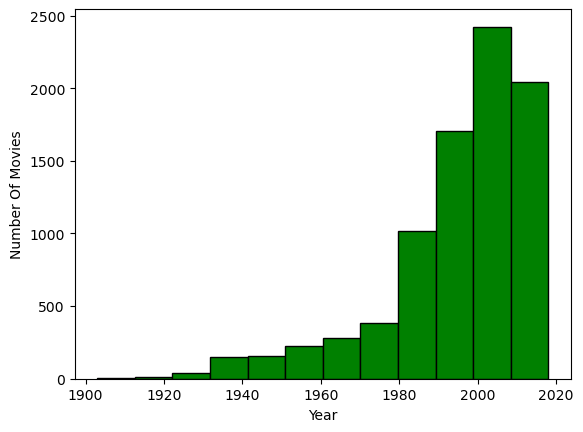

In [13]:
movies['year'] = movies['year'].astype('int')

y = movies['year']
plt.hist(y, bins=12, edgecolor='black', color='green')
plt.xlabel('Year')
plt.ylabel('Number Of Movies')

plt.show()

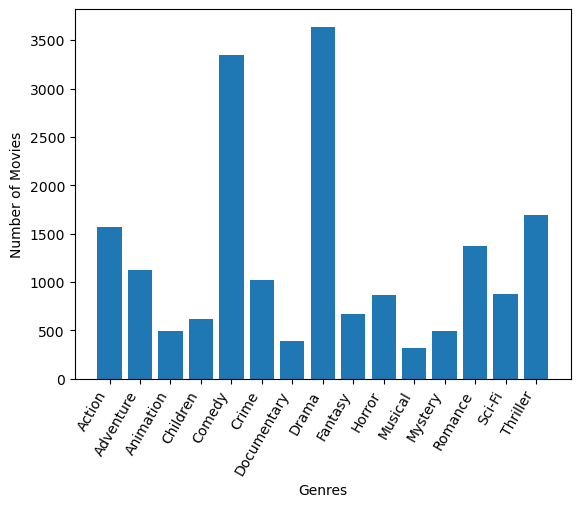

In [14]:
pd_genres_series = movies.drop(['movieId','year','title'], axis='columns').sum(axis='rows')

x = pd_genres_series.index
y = pd_genres_series.values

xpos = range(len(x))

plt.xticks(xpos, x, rotation=60, ha='right')

plt.bar(xpos,y)
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.show()

In [15]:
users = pd.read_csv('ml-latest-small/ratings.csv')
users.drop(['timestamp'], axis='columns', inplace=True)
print(users.shape)
users.head(10)

(100836, 3)


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0


In [16]:
users = users[users['movieId'].isin(movies['movieId'])]
users_to_movies = users
print(users.shape)
users.head(10)

(92373, 3)


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
4,1,50,5.0
5,1,70,3.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0
10,1,163,5.0


In [17]:
rating_series = users.groupby('movieId')['rating'].mean().round(2)
number_ratings = users.groupby('movieId').size()

median = number_ratings.median()

number_ratings = number_ratings[number_ratings>=median]
rating_series = rating_series[number_ratings.index]

In [18]:
W = number_ratings.median()/4
R = rating_series.quantile(0.25)

print(W,R)

2.25 2.88


In [19]:
new_columns = pd.DataFrame({'rating':rating_series, 'number_ratings':number_ratings}).reset_index()
new_columns.head(10)

,movieId,rating,number_ratings
0,1,3.92,215
1,2,3.43,110
2,3,3.26,52
3,4,2.36,7
4,5,3.07,49
5,6,3.95,102
6,7,3.19,54
7,8,2.88,8
8,9,3.12,16
9,10,3.50,132


In [20]:
movies = movies[movies['movieId'].isin(number_ratings.index)]
movies.head(10)

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller
0,1,Toy Story,1995,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0
1,2,Jumanji,1995,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,6,Heat,1995,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6,7,Sabrina,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7,8,Tom and Huck,1995,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death,1995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye,1995,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92373 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   92373 non-null  int64  
 1   movieId  92373 non-null  int64  
 2   rating   92373 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.8 MB


In [22]:
users_to_genres = users.merge(movies.drop(['title','year'], axis='columns'), on='movieId', how='inner')
users_to_genres.tail(10)

,userId,movieId,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller
87349,605,51024,3.5,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
87350,561,6800,3.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
87351,599,6800,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
87352,606,6800,1.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
87353,567,99917,3.5,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
87354,599,99917,3.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
87355,610,99917,3.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
87356,594,4794,0.5,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
87357,606,4794,3.5,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
87358,610,4794,5.0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


In [23]:
c=0.0

for i in range(movies.shape[0]):
    for j in range(3,18):
        if movies.iloc[i,j] == 1:
            r = new_columns.iloc[i,1]
            w = new_columns.iloc[i,2]
            movies.iloc[i,j] = (c + (1-c)*0.2*(W*R+w*r)/(W+w)).round(2)

In [24]:
users_to_genres = users_to_genres[users_to_genres['movieId'].isin(number_ratings.index)]
users_to_movies = users_to_movies[users_to_movies['movieId'].isin(number_ratings.index)]

users_to_genres.drop(['movieId'], axis='columns', inplace=True)
users_to_genres.tail(10)

,userId,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller
87349,605,3.5,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
87350,561,3.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
87351,599,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
87352,606,1.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
87353,567,3.5,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
87354,599,3.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
87355,610,3.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
87356,594,0.5,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
87357,606,3.5,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
87358,610,5.0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


In [25]:
cols_to_multiply = users_to_genres.columns[2:]
cols_to_multiply

Index(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller'],
      dtype='object')

In [26]:
users_to_genres.loc[:,cols_to_multiply] = users_to_genres.loc[:, cols_to_multiply].mul(users_to_genres['rating'], axis=0)
users_to_genres.tail(10)

,userId,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller
87349,605,3.5,0.0,3.5,0.0,0.0,0.0,0.0,0.0,3.5,3.5,0.0,0.0,0.0,0.0,0.0,0.0
87350,561,3.5,3.5,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87351,599,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87352,606,1.5,1.5,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87353,567,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,3.5,3.5
87354,599,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0
87355,610,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0
87356,594,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0,0.0
87357,606,3.5,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,3.5,0.0,3.5,0.0,0.0,0.0
87358,610,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0


In [27]:
users_movies_new = users_to_genres.groupby('userId')

def compute_mean(column):
    count=0
    column_sum=0
    
    for entry in column:
        if entry!=0:
            count+=1
            column_sum+=entry
    
    if count !=0:
        return column_sum/count
    return 0


group_df_column_names = users_to_genres.columns
new_users_movies = pd.DataFrame(columns = group_df_column_names)

for group_name, group_df in users_movies_new:
    avg_list = np.zeros(group_df.shape[1])
    
    for i, column_name in enumerate(group_df_column_names):
        avg_list[i] = compute_mean(group_df[column_name])
    new_users_movies.loc[len(new_users_movies)] = avg_list

new_users_movies

,userId,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller
0,1.0,4.362791,4.325301,4.375000,4.678571,4.536585,4.263889,4.333333,0.000,4.531250,4.282609,3.437500,4.681818,4.062500,4.307692,4.250000,4.134615
1,2.0,3.910714,3.954545,4.166667,0.000000,0.000000,4.000000,3.800000,4.000,3.882353,0.000000,3.000000,0.000000,4.000000,4.500000,3.875000,3.700000
2,3.0,1.716667,2.562500,2.222222,0.500000,0.500000,1.000000,0.500000,0.000,0.500000,3.375000,4.625000,0.500000,0.000000,0.500000,3.428571,3.166667
3,4.0,3.614943,3.444444,3.760000,4.000000,3.777778,3.528736,3.791667,5.000,3.547368,3.733333,4.333333,4.000000,3.631579,3.446809,3.111111,3.617647
4,5.0,3.609756,3.111111,3.250000,4.333333,4.111111,3.307692,3.833333,0.000,3.772727,4.333333,3.000000,4.400000,4.000000,2.750000,2.500000,3.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606.0,3.615385,3.100840,3.451754,3.600000,3.402778,3.532423,3.666667,3.800,3.733836,3.485294,3.312500,3.808824,3.779412,3.700000,3.609375,3.522013
606,607.0,3.808383,3.774194,3.475000,3.333333,3.411765,3.382979,3.880000,0.000,4.040000,3.500000,4.064516,3.600000,4.666667,3.480000,3.300000,4.098039
607,608.0,3.118370,3.320866,3.231928,3.072917,2.420732,2.716012,3.613139,2.800,3.431034,2.975000,3.323864,2.757576,3.561538,2.843434,3.313333,3.545267
608,609.0,3.242424,3.090909,3.222222,3.000000,3.000000,3.333333,3.500000,3.000,3.294118,3.000000,3.500000,0.000000,0.000000,3.200000,3.000000,3.285714


In [28]:
users_to_genres = new_users_movies.round(2)
users_to_genres['userId'] = users_to_genres['userId'].astype('int')

In [29]:
users_to_genres.tail(10)

,userId,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller
600,601,4.42,4.39,4.42,4.53,4.53,4.28,4.60,0.00,4.44,4.50,4.50,0.00,4.65,4.29,4.30,4.45
601,602,3.40,3.56,3.27,4.00,3.00,3.32,3.73,3.00,3.32,4.00,3.67,4.00,3.50,3.25,3.42,3.67
602,603,3.46,3.02,2.97,2.00,3.13,3.30,3.79,3.71,3.57,3.47,3.41,3.62,3.55,3.36,3.16,3.57
603,604,3.48,3.63,3.61,3.43,3.62,3.22,3.69,0.00,3.48,3.36,3.69,3.25,3.00,3.00,3.60,3.68
604,605,3.25,3.25,3.32,3.03,3.23,3.33,3.05,3.00,3.17,3.22,3.00,3.08,3.44,3.34,3.33,2.95
605,606,3.62,3.10,3.45,3.60,3.40,3.53,3.67,3.80,3.73,3.49,3.31,3.81,3.78,3.70,3.61,3.52
606,607,3.81,3.77,3.48,3.33,3.41,3.38,3.88,0.00,4.04,3.50,4.06,3.60,4.67,3.48,3.30,4.10
607,608,3.12,3.32,3.23,3.07,2.42,2.72,3.61,2.80,3.43,2.98,3.32,2.76,3.56,2.84,3.31,3.55
608,609,3.24,3.09,3.22,3.00,3.00,3.33,3.50,3.00,3.29,3.00,3.50,0.00,0.00,3.20,3.00,3.29
609,610,3.69,3.53,3.70,3.90,3.73,3.69,3.74,4.38,3.85,3.63,3.49,3.95,3.80,3.68,3.67,3.58


In [30]:
users_to_genres.rename(columns={'rating':'avg_rating'}, inplace=True)
users_to_genres

,userId,avg_rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller
0,1,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.00,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
1,2,3.91,3.95,4.17,0.00,0.00,4.00,3.80,4.00,3.88,0.00,3.00,0.00,4.00,4.50,3.88,3.70
2,3,1.72,2.56,2.22,0.50,0.50,1.00,0.50,0.00,0.50,3.38,4.62,0.50,0.00,0.50,3.43,3.17
3,4,3.61,3.44,3.76,4.00,3.78,3.53,3.79,5.00,3.55,3.73,4.33,4.00,3.63,3.45,3.11,3.62
4,5,3.61,3.11,3.25,4.33,4.11,3.31,3.83,0.00,3.77,4.33,3.00,4.40,4.00,2.75,2.50,3.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,3.62,3.10,3.45,3.60,3.40,3.53,3.67,3.80,3.73,3.49,3.31,3.81,3.78,3.70,3.61,3.52
606,607,3.81,3.77,3.48,3.33,3.41,3.38,3.88,0.00,4.04,3.50,4.06,3.60,4.67,3.48,3.30,4.10
607,608,3.12,3.32,3.23,3.07,2.42,2.72,3.61,2.80,3.43,2.98,3.32,2.76,3.56,2.84,3.31,3.55
608,609,3.24,3.09,3.22,3.00,3.00,3.33,3.50,3.00,3.29,3.00,3.50,0.00,0.00,3.20,3.00,3.29


In [31]:
users_data = users_to_movies.merge(users_to_genres, on='userId')
users_data.head(10)

,userId,movieId,rating,avg_rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller
0,1,1,4.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
1,1,3,4.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
2,1,6,4.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
3,1,50,5.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
4,1,70,3.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
5,1,101,5.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
6,1,110,4.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
7,1,151,5.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
8,1,157,5.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
9,1,163,5.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13


In [32]:
movies_data = movies.merge(users_data[['movieId']], on='movieId', how='right')
movies_data.head(10)

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller
0,1,Toy Story,1995,0.000,0.782,0.782,0.782,0.782,0.000,0.0,0.000,0.782,0.000,0.0,0.000,0.000,0.0,0.000
1,3,Grumpier Old Men,1995,0.000,0.000,0.000,0.000,0.648,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.648,0.0,0.000
2,6,Heat,1995,0.786,0.000,0.000,0.000,0.000,0.786,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.786
3,50,"Usual Suspects, The",1995,0.000,0.000,0.000,0.000,0.000,0.846,0.0,0.000,0.000,0.000,0.0,0.846,0.000,0.0,0.846
4,70,From Dusk Till Dawn,1996,0.698,0.000,0.000,0.000,0.698,0.000,0.0,0.000,0.000,0.698,0.0,0.000,0.000,0.0,0.698
5,101,Bottle Rocket,1996,0.000,0.740,0.000,0.000,0.740,0.740,0.0,0.000,0.000,0.000,0.0,0.000,0.740,0.0,0.000
6,110,Braveheart,1995,0.804,0.000,0.000,0.000,0.000,0.000,0.0,0.804,0.000,0.000,0.0,0.000,0.000,0.0,0.000
7,151,Rob Roy,1995,0.704,0.000,0.000,0.000,0.000,0.000,0.0,0.704,0.000,0.000,0.0,0.000,0.704,0.0,0.000
8,157,Canadian Bacon,1995,0.000,0.000,0.000,0.000,0.572,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000
9,163,Desperado,1995,0.708,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.708,0.0,0.000


In [33]:
print(users_data.shape)
print(movies_data.shape)
print(users_data.isna().any())
print(movies_data.isna().any())

(87359, 19)
(87359, 18)
userId         False
movieId        False
rating         False
avg_rating     False
Action         False
Adventure      False
Animation      False
Children       False
Comedy         False
Crime          False
Documentary    False
Drama          False
Fantasy        False
Horror         False
Musical        False
Mystery        False
Romance        False
Sci-Fi         False
Thriller       False
dtype: bool
movieId        False
title          False
year           False
Action         False
Adventure      False
Animation      False
Children       False
Comedy         False
Crime          False
Documentary    False
Drama          False
Fantasy        False
Horror         False
Musical        False
Mystery        False
Romance        False
Sci-Fi         False
Thriller       False
dtype: bool


In [34]:
print(movies_data.dtypes)
print(users_data.dtypes)

movieId          int64
title           object
year             int32
Action         float64
Adventure      float64
Animation      float64
Children       float64
Comedy         float64
Crime          float64
Documentary    float64
Drama          float64
Fantasy        float64
Horror         float64
Musical        float64
Mystery        float64
Romance        float64
Sci-Fi         float64
Thriller       float64
dtype: object
userId           int64
movieId          int64
rating         float64
avg_rating     float64
Action         float64
Adventure      float64
Animation      float64
Children       float64
Comedy         float64
Crime          float64
Documentary    float64
Drama          float64
Fantasy        float64
Horror         float64
Musical        float64
Mystery        float64
Romance        float64
Sci-Fi         float64
Thriller       float64
dtype: object


In [35]:
users_data = users_data.drop(['movieId'], axis='columns')
users_data.head(10)

,userId,rating,avg_rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller
0,1,4.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
1,1,4.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
2,1,4.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
3,1,5.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
4,1,3.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
5,1,5.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
6,1,4.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
7,1,5.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
8,1,5.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
9,1,5.0,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13


In [36]:
ratings_data = users_data[['rating']]
users_data.drop(['rating'], axis='columns', inplace=True)

In [37]:
ratings_data.head(15)

,rating
0,4.0
1,4.0
2,4.0
3,5.0
4,3.0
5,5.0
6,4.0
7,5.0
8,5.0
9,5.0


In [38]:
users_data.head(15)

,userId,avg_rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller
0,1,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
1,1,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
2,1,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
3,1,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
4,1,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
5,1,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
6,1,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
7,1,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
8,1,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13
9,1,4.36,4.33,4.38,4.68,4.54,4.26,4.33,0.0,4.53,4.28,3.44,4.68,4.06,4.31,4.25,4.13


In [39]:
movies_data.head(15)

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller
0,1,Toy Story,1995,0.000,0.782,0.782,0.782,0.782,0.000,0.0,0.000,0.782,0.000,0.0,0.000,0.000,0.000,0.000
1,3,Grumpier Old Men,1995,0.000,0.000,0.000,0.000,0.648,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.648,0.000,0.000
2,6,Heat,1995,0.786,0.000,0.000,0.000,0.000,0.786,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.786
3,50,"Usual Suspects, The",1995,0.000,0.000,0.000,0.000,0.000,0.846,0.0,0.000,0.000,0.000,0.0,0.846,0.000,0.000,0.846
4,70,From Dusk Till Dawn,1996,0.698,0.000,0.000,0.000,0.698,0.000,0.0,0.000,0.000,0.698,0.0,0.000,0.000,0.000,0.698
5,101,Bottle Rocket,1996,0.000,0.740,0.000,0.000,0.740,0.740,0.0,0.000,0.000,0.000,0.0,0.000,0.740,0.000,0.000
6,110,Braveheart,1995,0.804,0.000,0.000,0.000,0.000,0.000,0.0,0.804,0.000,0.000,0.0,0.000,0.000,0.000,0.000
7,151,Rob Roy,1995,0.704,0.000,0.000,0.000,0.000,0.000,0.0,0.704,0.000,0.000,0.0,0.000,0.704,0.000,0.000
8,157,Canadian Bacon,1995,0.000,0.000,0.000,0.000,0.572,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
9,163,Desperado,1995,0.708,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.708,0.000,0.000


In [40]:
print(movies_data['movieId'].unique().shape)
print(ratings_data.isna().any(), movies_data.isna().any(), users_data.isna().any())
print(ratings_data.shape, movies_data.shape, users_data.shape)

(4484,)
rating    False
dtype: bool movieId        False
title          False
year           False
Action         False
Adventure      False
Animation      False
Children       False
Comedy         False
Crime          False
Documentary    False
Drama          False
Fantasy        False
Horror         False
Musical        False
Mystery        False
Romance        False
Sci-Fi         False
Thriller       False
dtype: bool userId         False
avg_rating     False
Action         False
Adventure      False
Animation      False
Children       False
Comedy         False
Crime          False
Documentary    False
Drama          False
Fantasy        False
Horror         False
Musical        False
Mystery        False
Romance        False
Sci-Fi         False
Thriller       False
dtype: bool
(87359, 1) (87359, 18) (87359, 17)


In [41]:
ratings_data.to_csv('ratings_data.csv')
movies_data.to_csv('movies_data.csv')
users_data.to_csv('users_data.csv')